In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
# This last package is one I have developed and will do all the heavy lifting for us! 
# You will need to pip install it, the following line can be commented out after doing it once.
#! pip install git+https://github.com/CheerfulUser/TESSreduce.git
import tessreduce as tr

In [5]:
# Coordinates of GRB 191016A
ra = 30.26933
dec=24.50988
sector = 17
# This function takes the sky position and downloads the relevant cutout of TESS data
tess = tr.tessreduce(ra,dec,size=90,sector=sector)

TESS is pretty tricky to work with for transients since it has really extreme background light contamination from the Earth and Moon. If we plot the raw TESS data like is shown below, we don't see any trace of the GRB since the light curve is dominaated by scattered Moon light.

<IPython.core.display.Javascript object>


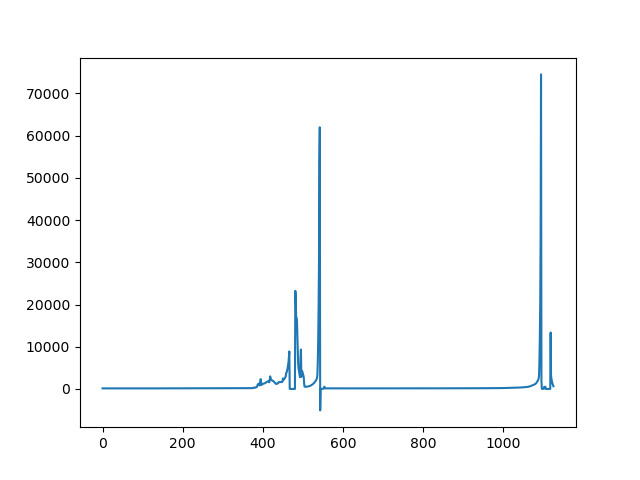

In [6]:
plt.figure()
plt.plot(tess.flux[:,45,45])

To get the data in a form where we can actually analyse it, all we need is 1 line of code. This one line identifies all sources in the imag, calculates the background, subtracts the background, aligns the images, and calculates the difference imaged light curve! 

made reference
made source mask
calculating background
background subtracted
calculating centroids
images shifted


<IPython.core.display.Javascript object>


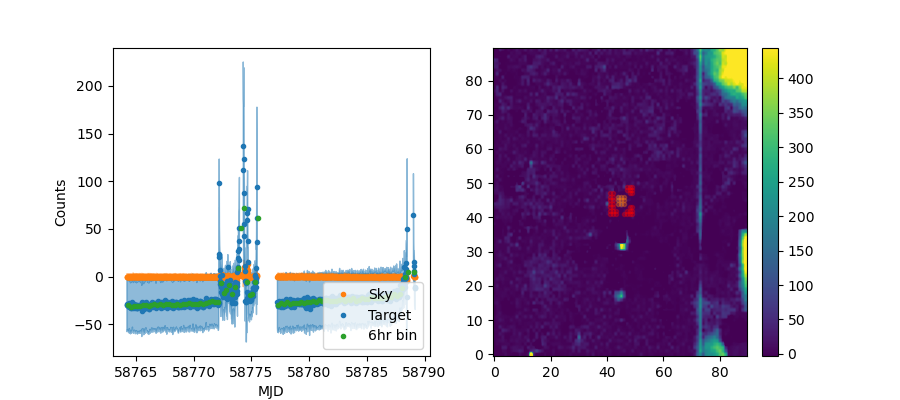

In [7]:
tess.reduce(diff=False)

Now the reduced variable is the reduced TESS images that should have our GRB visible 

This looks pretty bad, since the Moon really messed up the detector at certain times, but luckily the GRB occured before the Moon strikes! 

Since we know when the GRB occurs, lets plot that and zoom in to the right regon.

<IPython.core.display.Javascript object>


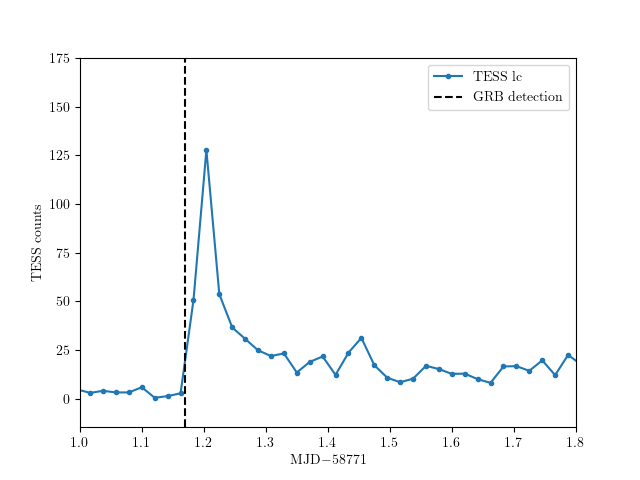

Text(0, 0.5, 'TESS counts')

In [13]:
lc = tess.lc
med = np.nanmedian(lc[1,:200])
plt.figure()
plt.plot(lc[0]-58771,lc[1]-med,'.-',label='TESS lc')
plt.axvline(1.17,color='k',ls='--',label='GRB detection')
#plt.ylim(-5,100)
plt.xlim(1,1.8)
plt.legend()
plt.xlabel('MJD$ -58771$')
plt.ylabel('TESS counts')

So we see the GRB rise in about an hour, then exponentially decay over a few hours. Since the decay is exponential, most of the brightness, or counts, fade after just an hour.

Now you have a nice TESS light curve of GRB 191016A to do science with!